In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
!pip install shap
import shap

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Algorithms
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVC

# Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion
from sklearn.base import TransformerMixin, BaseEstimator


# Evaluate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


# Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [6]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [7]:
df = pd.read_csv('2016-building-energy-benchmarking-66851c86083a4528564271.csv')

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

In [10]:
nan_counts_filtered = df.isna().sum()[df.isna().sum() > 0]
print(nan_counts_filtered)

ZipCode                              16
NumberofBuildings                     8
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
YearsENERGYSTARCertified           3257
ENERGYSTARScore                     843
SiteEUI(kBtu/sf)                      7
SiteEUIWN(kBtu/sf)                    6
SourceEUI(kBtu/sf)                    9
SourceEUIWN(kBtu/sf)                  9
SiteEnergyUse(kBtu)                   5
SiteEnergyUseWN(kBtu)                 6
SteamUse(kBtu)                        9
Electricity(kWh)                      9
Electricity(kBtu)                     9
NaturalGas(therms)                    9
NaturalGas(kBtu)                      9
Comments                           3376
Outlier                            3344
TotalGHGEmissions                     9


In [11]:
df2 = df.drop(columns=['OSEBuildingID','Latitude','Longitude', 'DataYear', 'PropertyName', 'City','Address', 'State', 'ZipCode','TaxParcelIdentificationNumber','CouncilDistrictCode','PropertyGFAParking', 'PropertyGFABuilding(s)','ListOfAllPropertyUseTypes','LargestPropertyUseTypeGFA','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType' ,'ThirdLargestPropertyUseTypeGFA','YearsENERGYSTARCertified','Comments','ComplianceStatus'])

In [12]:
df2 = df2[~df['Outlier'].isin(['High outlier', 'Low outlier'])]
df2 = df2.drop(columns=['Outlier'])

In [13]:
df2.shape

(3344, 23)

In [14]:
nan_counts_filtered = df2.isna().sum()[df.isna().sum() > 0]
print(nan_counts_filtered)

NumberofBuildings           8
LargestPropertyUseType     20
ENERGYSTARScore           834
SiteEUI(kBtu/sf)            7
SiteEUIWN(kBtu/sf)          6
SourceEUI(kBtu/sf)          9
SourceEUIWN(kBtu/sf)        9
SiteEnergyUse(kBtu)         5
SiteEnergyUseWN(kBtu)       6
SteamUse(kBtu)              9
Electricity(kWh)            9
Electricity(kBtu)           9
NaturalGas(therms)          9
NaturalGas(kBtu)            9
TotalGHGEmissions           9
GHGEmissionsIntensity       9
dtype: int64


In [15]:
median_value = df2['ENERGYSTARScore'].median()

df2['ENERGYSTARScore'] = df2['ENERGYSTARScore'].fillna(median_value)

In [16]:
df2 = df2.dropna()

In [17]:
df2.shape

(3321, 23)

In [18]:
colonnes_a_supprimer = ['SourceEUI(kBtu/sf)' ,'SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','Electricity(kWh)','Electricity(kBtu)','NaturalGas(therms)','NaturalGas(kBtu)','SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SteamUse(kBtu)','Electricity(kWh)','Electricity(kBtu)','NaturalGas(therms)','NaturalGas(kBtu)', 'DefaultData', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'GHGEmissionsIntensity']

df_clean = df2.drop(columns=colonnes_a_supprimer)

In [19]:
df_clean['TotalGHGEmissions'] = np.log(df_clean['TotalGHGEmissions'] + 1)

In [20]:
df_clean.shape

(3321, 10)

In [21]:
df_clean

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,ENERGYSTARScore,TotalGHGEmissions
0,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,Hotel,60.0,5.525373
1,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,103566,Hotel,61.0,5.693261
2,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,956110,Hotel,43.0,7.645053
3,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,61320,Hotel,56.0,5.660979
4,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,175580,Hotel,75.0,6.226556
...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,GREATER DUWAMISH,1990,1.0,1,12294,Office,46.0,3.088311
3372,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1,16000,Other - Recreation,75.0,3.501646
3373,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1,13157,Other - Recreation,75.0,5.414054
3374,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1,14101,Other - Recreation,75.0,3.140265


In [22]:
print(df_clean['Neighborhood'].unique())

['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'Central' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'CENTRAL' 'SOUTHWEST' 'DELRIDGE' 'Ballard' 'North' 'Delridge'
 'Northwest' 'DELRIDGE NEIGHBORHOODS']


In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3321 entries, 0 to 3375
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BuildingType            3321 non-null   object 
 1   PrimaryPropertyType     3321 non-null   object 
 2   Neighborhood            3321 non-null   object 
 3   YearBuilt               3321 non-null   int64  
 4   NumberofBuildings       3321 non-null   float64
 5   NumberofFloors          3321 non-null   int64  
 6   PropertyGFATotal        3321 non-null   int64  
 7   LargestPropertyUseType  3321 non-null   object 
 8   ENERGYSTARScore         3321 non-null   float64
 9   TotalGHGEmissions       3321 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 285.4+ KB


In [24]:
X = df_clean.drop(['TotalGHGEmissions'], axis=1)
y = df_clean['TotalGHGEmissions']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
cat_cols = ['BuildingType','PrimaryPropertyType','LargestPropertyUseType','Neighborhood']
numerical_features = ['YearBuilt','ENERGYSTARScore','NumberofBuildings','NumberofFloors','PropertyGFATotal']

In [27]:
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

In [28]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, cat_cols)
    ])

In [30]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['YearBuilt', 'ENERGYSTARScore',
                                  'NumberofBuildings', 'NumberofFloors',
                                  'PropertyGFATotal']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['BuildingType', 'PrimaryPropertyType',
                                  'LargestPropertyUseType', 'Neighborhood'])])

In [31]:
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [32]:
linear_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['YearBuilt',
                                                   'ENERGYSTARScore',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BuildingType',
                                                   'PrimaryPropertyType',
                                                   'LargestPropertyUseType',
                                                   'Neighborhood'])])),
                ('regressor', LinearRegression())])

In [33]:
trained_pipe = linear_pipeline.fit(X_train, y_train)

In [34]:
trained_pipe.predict(X_test)

array([ 5.8727811 ,  2.85399425,  2.71146048,  3.55416809,  2.84222251,
        2.40094257,  3.48871714,  1.99844988,  2.57490247,  2.54461257,
        4.04706638,  3.02750544,  3.63729668,  4.75667425,  3.43519218,
        3.03878449,  3.03918611,  3.86422462,  2.29392953,  2.79849654,
        4.8601554 ,  2.55080929,  4.8428771 ,  4.17642704,  3.95284975,
        3.13239308,  8.30953868,  3.05368956,  2.96126337,  4.05641272,
        2.76237143,  3.65761964,  3.75246724,  4.33554969,  5.13591818,
        2.3067804 ,  2.59061989,  4.73625531,  2.54883998,  4.04549955,
        4.95556465,  3.5047039 ,  2.47238463,  3.00972118,  3.07326239,
        3.96980194,  2.52932445,  3.75808649,  3.1717681 ,  2.48768283,
        4.53936589,  3.25100897,  2.78215548,  3.17963744,  3.06085471,
        3.52845763,  2.81720369,  2.42212675,  3.31455336,  2.59123919,
        2.27033209,  5.05999108,  2.93166646,  4.05034023,  3.45574605,
        4.33690498,  4.38297324,  3.2113366 ,  4.66601998,  3.63

In [35]:
trained_pipe.score(X_test,y_test)

-0.715939368560653

In [36]:
0.7723708427011504

0.7723708427011504

In [37]:
y_pred = trained_pipe.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 3.548383757935241
R^2 Score: -0.715939368560653


In [38]:
cross_val_score(linear_pipeline, X_train, y_train, cv=5, scoring='r2').mean()

0.4741592569623708

In [39]:
0.47416103242302005

0.47416103242302005

In [40]:
XGPipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBRegressor(n_estimators=100, random_state=42))
])

In [41]:
XGPipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['YearBuilt',
                                                   'ENERGYSTARScore',
                                                   'NumberofBuildings',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BuildingType',
                                                   'PrimaryPropertyType',
                                                   'LargestPropertyUseType',
                                                   'Neighbo...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [42]:
cross_val_score(XGPipeline, X_train, y_train, cv=5, scoring='r2').mean()

0.5872005926963675

In [43]:
0.5835119617844968

0.5835119617844968

In [44]:
XG_trained_pipe = XGPipeline.fit(X_train, y_train)

In [45]:
xgb_pred = XG_trained_pipe.predict(X_test)

In [46]:
XG_trained_pipe.score(X_test,y_test)
print("XGBoost Regression - Mean Squared Error (MSE):", mean_squared_error(y_test, xgb_pred))
print("XGBoost Regression - R^2 Score:", r2_score(y_test, xgb_pred))

XGBoost Regression - Mean Squared Error (MSE): 0.8075507940626466
XGBoost Regression - R^2 Score: 0.6094818671893489


In [47]:
0.6271016980978834

0.6271016980978834

In [48]:
XG_trained_pipe.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('scaler', RobustScaler())]),
                                    ['YearBuilt', 'ENERGYSTARScore',
                                     'NumberofBuildings', 'NumberofFloors',
                                     'PropertyGFATotal']),
                                   ('cat',
                                    Pipeline(steps=[('onehot',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['BuildingType', 'PrimaryPropertyType',
                                     'LargestPropertyUseType', 'Neighborhood'])])),
  ('classifier',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False,

In [49]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_child_weight': [1, 3, 5],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

In [50]:
df8 = pd.read_csv('2017_Building_Energy_Benchmarking.csv')

In [51]:
df8

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier
0,1,2017,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7.0,DOWNTOWN,47.61220,-122.33799,1927.0,1.0,12.0,88434,0.0,88434.0,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,63.0,83.2,82.3,184.4,181.6,7.361655e+06,7.274452e+06,2122835.75,1.157783e+06,3.950356e+06,12884.63,1288462.99,197.63,2.235,N,Compliant,NaN
1,2,2017,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7.0,DOWNTOWN,47.61317,-122.33393,1996.0,1.0,11.0,103566,15064.0,88502.0,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,72.0,88.2,86.8,163.8,159.8,7.804844e+06,7.678810e+06,NaN,8.841610e+05,3.016757e+06,47880.87,4788086.72,266.78,2.576,N,Compliant,NaN
2,3,2017,Campus,Hotel,84SC9-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7.0,DOWNTOWN,47.61393,-122.33810,1969.0,1.0,41.0,956110,196718.0,759392.0,"Hotel, Parking, Swimming Pool",Hotel,756493.0,Parking,138635.0,Swimming Pool,0.0,NaN,48.0,98.4,98.2,242.9,242.6,7.447033e+07,7.431137e+07,24313482.00,1.427692e+07,4.871284e+07,14440.00,1444000.10,1570.75,1.643,N,Compliant,NaN
3,5,2017,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,SEATTLE,WA,98101.0,0659000640,7.0,DOWNTOWN,47.61412,-122.33664,1926.0,1.0,10.0,61320,0.0,61320.0,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,51.0,120.2,119.0,234.3,230.3,7.372222e+06,7.294312e+06,2228119.50,8.817449e+05,3.008514e+06,21355.88,2135587.89,244.32,3.984,N,Compliant,NaN
4,8,2017,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7.0,DOWNTOWN,47.61375,-122.34047,1980.0,1.0,18.0,175580,62000.0,113580.0,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,78.0,116.1,114.1,209.9,205.5,1.433578e+07,1.408125e+07,NaN,1.523506e+06,5.198202e+06,91375.76,9137575.78,506.80,2.886,N,Compliant,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,50265,2017,Multifamily LR (1-4),NaN,NaN,1861 16TH AVE,SEATTLE,WA,NaN,8080400145,1.0,EAST,47.61826,-122.31184,1906.0,NaN,4.0,39984,9234.0,30750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.000,N,Compliant,NaN
3457,50268,2017,Multifamily MR (5-9),Mid-Rise Multifamily,Decibel Apartments,301 12th Ave,Seattle,WA,98122.0,2197600742,3.0,EAST,47.60451,-122.31711,2016.0,1.0,7.0,69656,8477.0,61179.0,"Multifamily Housing, Parking",Multifamily,71695.0,Parking,5651.0,NaN,NaN,NaN,100.0,18.8,18.8,36.5,36.5,1.349080e+06,1.349080e+06,NaN,1.682466e+05,5.740574e+05,7750.23,775022.95,43.54,0.625,N,Compliant,NaN
3458,50272,2017,Multifamily MR (5-9),Mid-Rise Multifamily,Mad Flats,1523 E. Madison Street,Seattle,WA,98122.0,7234600220,3.0,CENTRAL,47.61469,-122.31171,2015.0,1.0,6.0,20838,0.0,20838.0,Multifamily Housing,Multifamily,16517.0,NaN,NaN,NaN,NaN,NaN,100.0,54.6,54.7,121.0,121.0,9.024829e+05,9.027771e+05,NaN,1.472702e+05,5.024859e+05,3999.97,399997.00,23.32,1.119,N,Compliant,NaN
3459,50284,2017,Multifamily MR (5-9),Mid-Rise Multifamily,Vive,1516 NW 51st St,Seattle,WA,98107.0,2767701650,6.0,BALLARD,47.66601,-122.37725,2015.0,1.0,6.0

In [52]:
joblib.dump(XGPipeline, 'modelXG.pkl')

['modelXG.pkl']

In [53]:
loaded_model = joblib.load('modelXG.pkl')

y_pred_loaded_model = loaded_model.predict(X_test)

mse_loaded_model = mean_squared_error(y_test, y_pred_loaded_model)
r2_loaded_model = r2_score(y_test, y_pred_loaded_model)

print("Mean Squared Error (Modèle chargé):", np.sqrt(mse_loaded_model))
print("R^2 Score (Modèle chargé):", r2_loaded_model)

Mean Squared Error (Modèle chargé): 0.8986382999086154
R^2 Score (Modèle chargé): 0.6094818671893489


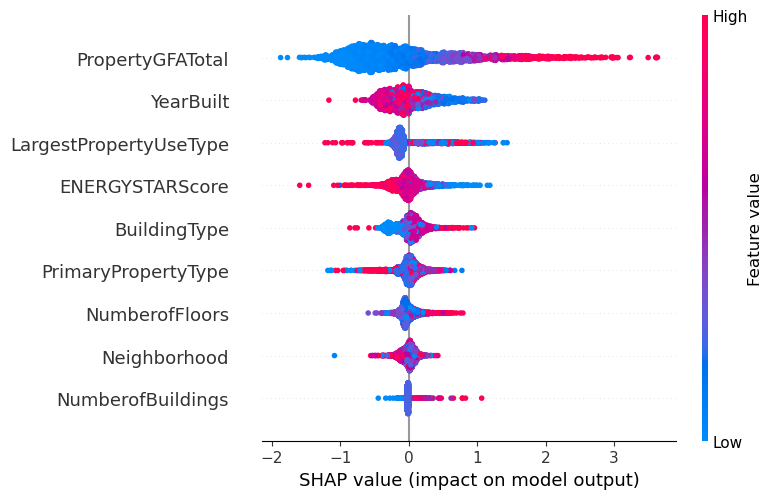

In [59]:
# Encoder les variables catégorielles
X_encoded = X.copy()
label_encoders = {}
for column in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(X_encoded[column])
    label_encoders[column] = le

# Entraîner le modèle
model = xgboost.XGBRegressor().fit(X_encoded, y)

# Créer un explainer SHAP
explainer = shap.Explainer(model, X_encoded)
shap_values = explainer(X_encoded)

# Assurez-vous que shap_values est bien une instance de shap.Explanation
assert isinstance(shap_values, shap.Explanation), "shap_values n'est pas une instance de shap.Explanation"

# Visualiser les valeurs de SHAP pour une prédiction spécifique
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0], X_encoded.iloc[0])

# Visualiser l'importance globale des caractéristiques
shap.summary_plot(shap_values, X_encoded)


In [58]:
print(X.dtypes)


BuildingType               object
PrimaryPropertyType        object
Neighborhood               object
YearBuilt                   int64
NumberofBuildings         float64
NumberofFloors              int64
PropertyGFATotal            int64
LargestPropertyUseType     object
ENERGYSTARScore           float64
dtype: object
